In [1]:
import numpy as np
import matplotlib.pyplot as plt

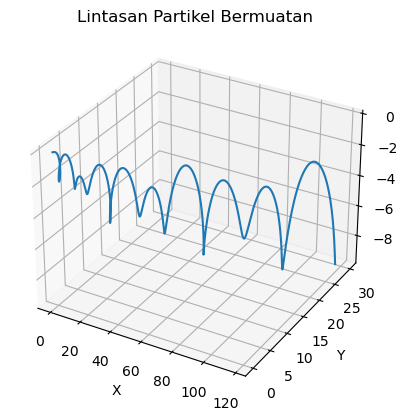

In [2]:
def runge_kutta_order_2(q, m, t, dt, initial_conditions):
    """
    Implementasi metode Runge-Kutta orde-2 untuk simulasi lintasan partikel bermuatan
    dalam medan listrik dan magnetik.

    Parameters:
        q: Muatan partikel
        m: Massa partikel
        t: Waktu awal hingga waktu akhir
        dt: Langkah waktu
        initial_conditions: Kondisi awal [x, y, z, vx, vy, vz]

    Returns:
        Trajektori partikel: List [x, y, z]
    """
    trajektori = []
    kondisi = np.array(initial_conditions, dtype=float)

    while t <= waktu_akhir:
        E = np.array([2, 3, 2 * t])
        B = np.array([4, np.sin(2 * np.pi * t), 0])

        # F = ma = qE + v x B
        F = q * E + np.cross(kondisi[3:], q * B)
        
        # Runge-Kutta orde-2
        k1 = dt * F / m
        k2 = dt * (F + k1 / 2) / m

        kondisi[0:3] += kondisi[3:] * dt + 0.5 * k1
        kondisi[3:] += k2

        trajektori.append(kondisi[0:3].copy())
        t += dt

    return np.array(trajektori)

# Parameter simulasi
q = 1.0   # Muatan partikel
m = 1.0   # Massa partikel
waktu_awal = 0.0
waktu_akhir = 10.0
langkah_waktu = 0.01

# Kondisi awal [x, y, z, vx, vy, vz]
initial_conditions = [0, 0, 0, 1, 0, 0]

# Simulasi
trajektori = runge_kutta_order_2(q, m, waktu_awal, langkah_waktu, initial_conditions)

# Visualisasi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajektori[:, 0], trajektori[:, 1], trajektori[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lintasan Partikel Bermuatan')

plt.show()